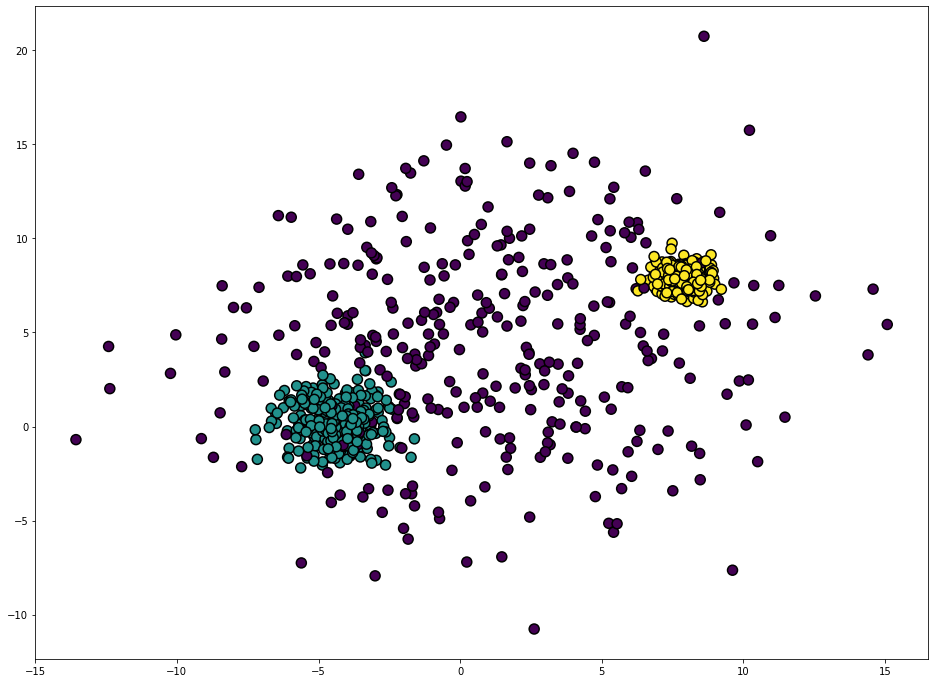

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

n_samples = 1000

varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[5, 1, 0.5],
                             random_state=3)
X, y = varied[0], varied[1]

plt.figure( figsize=(16,12))
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()


In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(X)


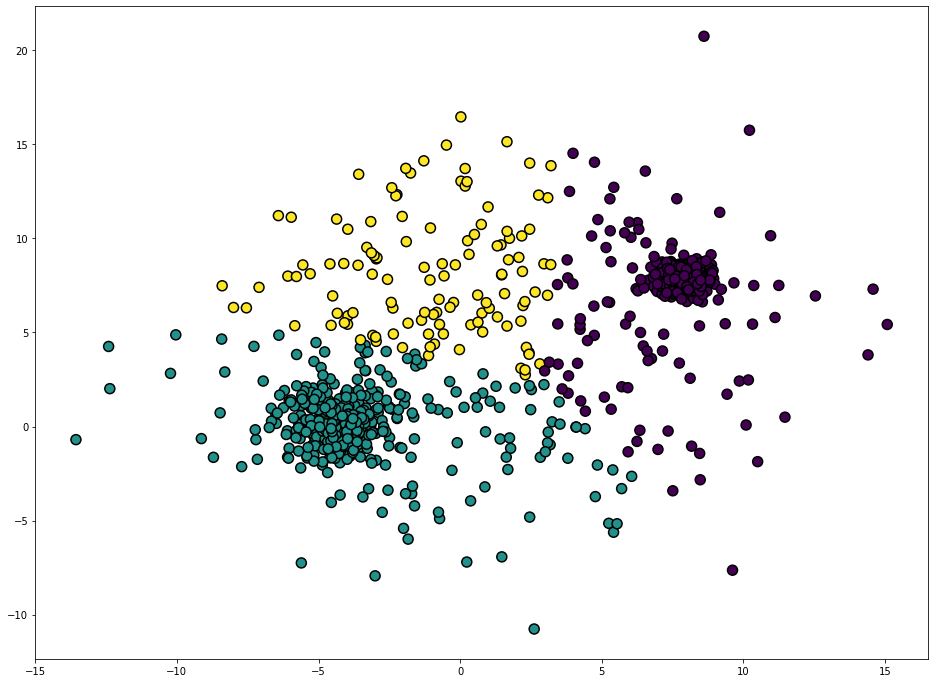

In [4]:
plt.figure( figsize=(16,12))
plt.scatter(X[:,0], X[:,1], c=pred, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()


In [5]:
# TODO: Import GaussianMixture
from sklearn.mixture import GaussianMixture

# TODO: Create an instance of Gaussian Mixture with 3 components
gmm = GaussianMixture(n_components=3).fit(X)

# TODO: fit the dataset
gmm = gmm.fit(X)

# TODO: predict the clustering labels for the dataset
pred_gmm = gmm.predict(X)


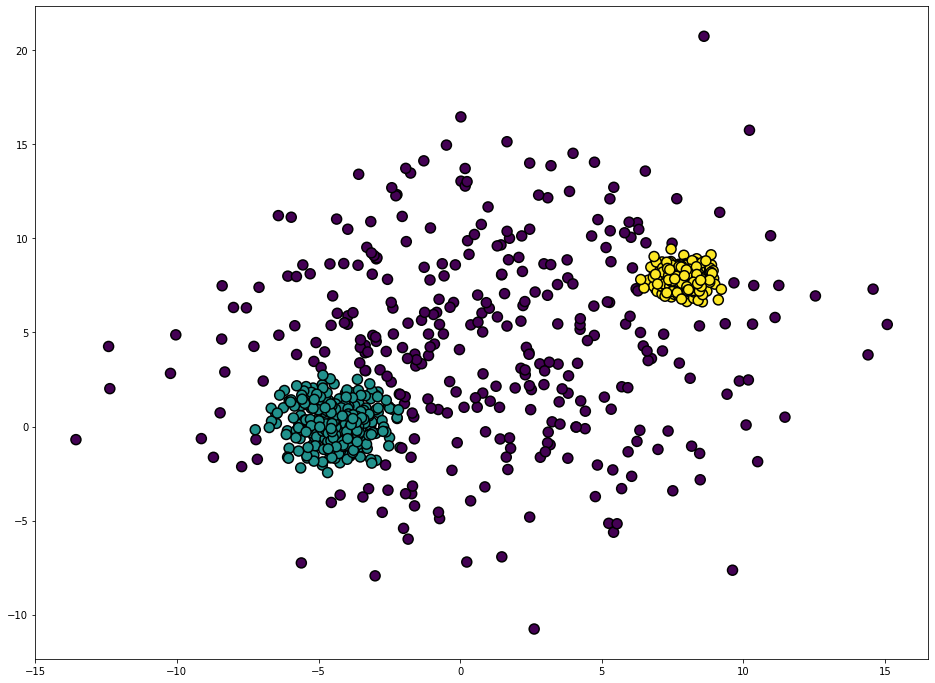

In [6]:
plt.figure( figsize=(16,12))
plt.scatter(X[:,0], X[:,1], c=pred_gmm, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

# KMeans vs GMM on The Iris Dataset

In [7]:
import seaborn as sns

iris = sns.load_dataset("iris")

iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


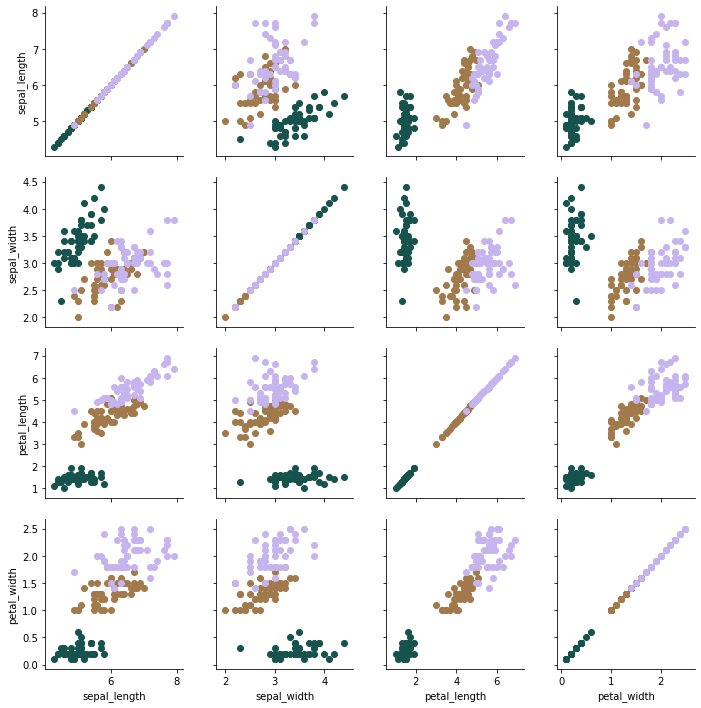

In [8]:
g = sns.PairGrid(iris, hue="species", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

In [9]:
kmeans_iris = KMeans(n_clusters=3)
pred_kmeans_iris = kmeans_iris.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

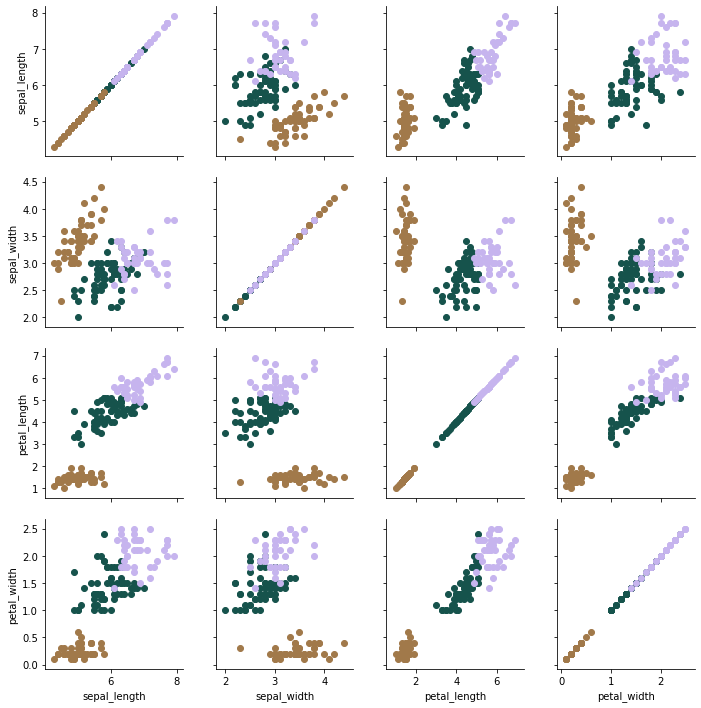

In [10]:
iris['kmeans_pred'] = pred_kmeans_iris

g = sns.PairGrid(iris, hue="kmeans_pred", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()


In [11]:
from sklearn.metrics import adjusted_rand_score

# TODO: calculate adjusted rand score passing in the original labels and the kmeans predicted labels 
iris_kmeans_score = adjusted_rand_score(iris['species'], iris['kmeans_pred'])

# Print the score
iris_kmeans_score


0.7302382722834697

In [12]:
gmm_iris = GaussianMixture(n_components=3).fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])
pred_gmm_iris = gmm_iris.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])


In [13]:
iris['gmm_pred'] = pred_gmm_iris

# TODO: calculate adjusted rand score passing in the original 
# labels and the GMM predicted labels iris['species']
iris_gmm_score = adjusted_rand_score(iris['species'], iris['gmm_pred'])

# Print the score
iris_gmm_score


0.9038742317748124